In [106]:
# Neural network api integrated with tensorflow

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [107]:
# Sequential modal

train_labels = []
train_samples = []


As motivation for this data, let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.


In [108]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

We now convert both lists into numpy arrays due to what we discussed the fit() function expects, and we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [109]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)


In [110]:
# concerting age in range of 0 to 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [111]:
# activation_function = relu
# activation_function = softmax // gives probability for each output class
# input data diminution = 1
# layer contain 16 neurons
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    
    # output layer
    Dense(units=2, activation='softmax')
])

In [112]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [114]:
# epoch = 30 
# the model is going to process or train on all of the data in the data set
# 30 times before completing the total training process.

model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, shuffle=True,epochs=30, verbose=2)

Epoch 1/30


210/210 - 0s - loss: 0.6458 - accuracy: 0.5452 - 212ms/epoch - 1ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6259 - accuracy: 0.6124 - 73ms/epoch - 347us/step
Epoch 3/30
210/210 - 0s - loss: 0.6049 - accuracy: 0.6590 - 72ms/epoch - 345us/step
Epoch 4/30
210/210 - 0s - loss: 0.5820 - accuracy: 0.7071 - 73ms/epoch - 349us/step
Epoch 5/30
210/210 - 0s - loss: 0.5570 - accuracy: 0.7362 - 73ms/epoch - 347us/step
Epoch 6/30
210/210 - 0s - loss: 0.5307 - accuracy: 0.7733 - 77ms/epoch - 366us/step
Epoch 7/30
210/210 - 0s - loss: 0.5027 - accuracy: 0.8124 - 75ms/epoch - 357us/step
Epoch 8/30
210/210 - 0s - loss: 0.4743 - accuracy: 0.8381 - 73ms/epoch - 350us/step
Epoch 9/30
210/210 - 0s - loss: 0.4466 - accuracy: 0.8610 - 70ms/epoch - 333us/step
Epoch 10/30
210/210 - 0s - loss: 0.4208 - accuracy: 0.8724 - 71ms/epoch - 338us/step
Epoch 11/30
210/210 - 0s - loss: 0.3970 - accuracy: 0.8829 - 73ms/epoch - 347us/step
Epoch 12/30
210/210 - 0s - loss: 0.3756 - accuracy: 0.8976 - 77ms/epoch - 366us/step
E

In [115]:
# validation split does is it does what it sounds like it splits out a portion
# of the training set into a validation set. So we just set this to a number between zero and one.
# So just a fractional number to tell Kerris How much of the training set we need to split
# out into the validation set. So here I'm splitting out 10% of the training set.
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1,shuffle=True, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2543 - accuracy: 0.9317 - val_loss: 0.2475 - val_accuracy: 0.9429 - 127ms/epoch - 673us/step
Epoch 2/30
189/189 - 0s - loss: 0.2531 - accuracy: 0.9402 - val_loss: 0.2462 - val_accuracy: 0.9238 - 83ms/epoch - 438us/step
Epoch 3/30
189/189 - 0s - loss: 0.2520 - accuracy: 0.9317 - val_loss: 0.2452 - val_accuracy: 0.9238 - 79ms/epoch - 419us/step
Epoch 4/30
189/189 - 0s - loss: 0.2510 - accuracy: 0.9360 - val_loss: 0.2442 - val_accuracy: 0.9429 - 110ms/epoch - 580us/step
Epoch 5/30
189/189 - 0s - loss: 0.2501 - accuracy: 0.9354 - val_loss: 0.2432 - val_accuracy: 0.9429 - 82ms/epoch - 433us/step
Epoch 6/30
189/189 - 0s - loss: 0.2492 - accuracy: 0.9407 - val_loss: 0.2423 - val_accuracy: 0.9429 - 81ms/epoch - 427us/step
Epoch 7/30
189/189 - 0s - loss: 0.2485 - accuracy: 0.9370 - val_loss: 0.2414 - val_accuracy: 0.9238 - 81ms/epoch - 426us/step
Epoch 8/30
189/189 - 0s - loss: 0.2477 - accuracy: 0.9344 - val_loss: 0.2406 - val_accuracy: 0.9238 - 80ms/epoch - 4

In [116]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [117]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [118]:
for i in predictions:
    print(i)

[0.9684632  0.03153688]
[0.42314282 0.57685715]
[0.14898954 0.85101044]
[0.85159415 0.14840579]
[0.96835035 0.03164969]
[0.62549365 0.37450632]
[0.07752866 0.9224713 ]
[0.42314282 0.57685715]
[0.01108422 0.9889158 ]
[0.04352228 0.9564777 ]
[0.9684787  0.03152135]
[0.8964668  0.10353325]
[0.9684466 0.0315534]
[0.9683985  0.03160152]
[0.9140621  0.08593794]
[0.01108422 0.9889158 ]
[0.96417004 0.03582996]
[0.8757586  0.12424138]
[0.9684632  0.03153688]
[0.14898954 0.85101044]
[0.02404336 0.9759567 ]
[0.9626548  0.03734516]
[0.9675047  0.03249527]
[0.82367617 0.17632382]
[0.20777202 0.792228  ]
[0.01221521 0.98778474]
[0.04798367 0.9520163 ]
[0.6723069  0.32769305]
[0.94069105 0.05930887]
[0.20777202 0.792228  ]
[0.07052378 0.9294762 ]
[0.9683021  0.03169795]
[0.01346002 0.98654   ]
[0.04352228 0.9564777 ]
[0.96835035 0.03164969]
[0.01005688 0.98994315]
[0.92890424 0.0710958 ]
[0.01221521 0.98778474]
[0.92890424 0.0710958 ]
[0.01346002 0.98654   ]
[0.20777202 0.792228  ]
[0.95271045 0.0472

In [119]:
# This is a NumPy function that returns the indices of the maximum values along a specified axis of an array.
# axis=-1: This argument specifies the axis along which you want to find the maximum values.
# In this case, axis=-1 means that you want to find the maximum values along the last axis 
# (the rightmost axis) of the predictions array.
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
    print(i)

0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
1
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
1
0
1
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1


In [120]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[199  11]
 [ 10 200]]


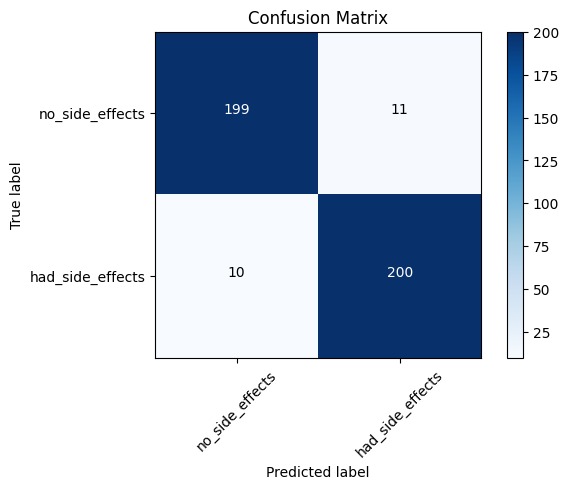

In [123]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


1. model.save()

In [127]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [129]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [138]:
new_model.summary()
new_model.get_weights()
new_model.optimizer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2. model.to_json()
if you only need to save the architecture of a model and not its weights etc.

In [139]:
json_string = model.to_json()


In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

3. model.save_weights()

The last saving mechanism we'll discuss only saves the weights of the model.
We can do this by calling model.save_weights() and passing in the path and file name to save the weights to with an h5 extension.
At a later point, we could then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.



In [ ]:
model.save_weights('models/my_model_weights.h5')

model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')